In [2404]:
#reading dataset 1805516
import pandas as pd
import numpy as np
dat=pd.read_csv("/content/1805516.csv")
data=pd.DataFrame(dat)
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200705742,DOT us,2019-02-06 00:00:00,2019.0,1.928657e+09,2019-01-22,20190121,20190122,20190211.0,USD,RV,1.0,NaN,2079.55,20190122.0,NAD1,1.928657e+09,0
1,U001,0200803720,DEC trust,2019-05-01 00:00:00,2019.0,1.929211e+09,2019-04-26,20190426,20190426,20190509.0,USD,RV,1.0,NaN,68.52,20190416.0,NAM4,1.929211e+09,0
2,U001,0200592182,DECA co,2019-06-03 00:00:00,2019.0,1.929378e+09,2019-05-25,20190525,20190525,20190608.0,USD,RV,1.0,NaN,1677.82,20190516.0,NAM4,1.929378e+09,0
3,U001,0200769623,WAL-MAR associates,2019-02-20 00:00:00,2019.0,1.928766e+09,2019-02-09,20190208,20190209,20190224.0,USD,RV,1.0,NaN,66906.76,20190209.0,NAH4,1.928766e+09,0
4,U001,200769623,WAL-MAR in,2019-06-12 00:00:00,2019.0,1.929407e+09,2019-06-01,20190530,20190601,20190616.0,USD,RV,1.0,NaN,65593.95,20190601.0,NAH4,1.929407e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200861551,MRS GR in,NaN,2020.0,1.930572e+09,2020-03-04,20200302,20200304,20200319.0,USD,RV,1.0,NaN,40758.07,20200304.0,NAA8,1.930572e+09,1
49996,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930637e+09,2020-03-13,20200311,20200313,20200328.0,USD,RV,1.0,NaN,14981.09,20200313.0,NAH4,1.930637e+09,1
49997,U001,200965912,C&S W,NaN,2020.0,1.930861e+09,2020-05-05,20200505,20200505,20200520.0,USD,RV,1.0,NaN,14514.31,20200505.0,NAC6,1.930861e+09,1
49998,U001,0200820380,SMITH'S trust,NaN,2020.0,1.930803e+09,2020-04-21,20200420,20200421,20200506.0,USD,RV,1.0,NaN,40345.38,20200421.0,NAA8,1.930803e+09,1


In [2405]:
data.shape

(50000, 19)

In [2406]:
len(pd.unique(data['posting_id'])) #constant

1

In [2407]:
data.drop(columns=['posting_id'],inplace=True)#since constant column will not contribute so drop

In [2408]:
#checking how many columns of the dataset have mean of null values to preprocess
for i in data.columns:
  print(i," ",data[i].isnull().mean())

business_code   0.0
cust_number   0.0
name_customer   0.0
clear_date   0.06476
buisness_year   0.0
doc_id   0.0
posting_date   0.0
document_create_date   0.0
document_create_date.1   0.0
due_in_date   0.0
invoice_currency   0.0
document type   0.0
area_business   1.0
total_open_amount   0.0
baseline_create_date   0.0
cust_payment_terms   0.0
invoice_id   0.0001
isOpen   0.0


In [2409]:
#area_business have all null values so drop
data.drop(['area_business'],axis=1,inplace=True)

In [2410]:
#invoice have some values null
data['invoice_id'].isnull().sum()

5

In [2411]:
data.loc[data['invoice_id'].isnull()]#null values are not useful so drop


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
2297,CA02,0140106054,TREE corporation,2019-05-06 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190207,20190217.0,CAD,X2,12964.32,20190207.0,CA10,NaN,0
10824,CA02,0140104409,LOB us,2019-05-03 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190221,20190303.0,CAD,X2,912.44,20190221.0,CA10,NaN,0
38540,CA02,0140104409,LOB trust,2019-05-31 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190307,20190317.0,CAD,X2,17264.88,20190307.0,CA10,NaN,0
42577,CA02,0140106054,TREE llc,2019-05-22 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190301,20190311.0,CAD,X2,21245.76,20190301.0,CA10,NaN,0
43223,CA02,0140104409,LOB in,2019-05-08 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190225,20190307.0,CAD,X2,15922.44,20190225.0,CA10,NaN,0


In [2412]:
#drop 5 invoice having null values
data = data.dropna(axis=0, subset=['invoice_id'])

In [2413]:
data['invoice_id'].isnull().sum()
#once again checking no of null values in invoice id

0

In [2414]:

for i in data.columns:
  print(i)

business_code
cust_number
name_customer
clear_date
buisness_year
doc_id
posting_date
document_create_date
document_create_date.1
due_in_date
invoice_currency
document type
total_open_amount
baseline_create_date
cust_payment_terms
invoice_id
isOpen


In [2415]:
#no duplicate rows
data.duplicated().sum()

0

In [2416]:
#checking duplicate columns:
data_t = data.T
data_t.duplicated().sum()


1

In [2417]:
#displaying duplicated column
data_t[data_t.duplicated()]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,49960,49961,49962,49963,49964,49965,49966,49967,49968,49969,49970,49971,49972,49973,49974,49975,49976,49977,49978,49979,49980,49981,49982,49983,49984,49985,49986,49987,49988,49989,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
invoice_id,1.92866e+09,1.92921e+09,1.92938e+09,1.92877e+09,1.92941e+09,1.92898e+09,1.93014e+09,1.92982e+09,1.9289e+09,1.93003e+09,1.92957e+09,1.92868e+09,1.92943e+09,2.96052e+09,1.92925e+09,1.92981e+09,1.93033e+09,1.92903e+09,1.92983e+09,1.93034e+09,1.92926e+09,1.929e+09,1.92953e+09,1.92975e+09,1.93027e+09,1.92968e+09,1.93004e+09,1.92936e+09,1.93001e+09,1.92867e+09,1.93018e+09,1.92886e+09,1.92992e+09,1.93051e+09,1.92986e+09,1.93035e+09,1.92987e+09,1.92983e+09,1.9291e+09,1.92899e+09,...,1.93078e+09,1.93065e+09,1.93062e+09,1.9308e+09,1.93059e+09,1.93077e+09,1.93064e+09,1.93076e+09,1.93066e+09,1.93065e+09,1.93086e+09,1.93067e+09,1.93059e+09,1.93083e+09,1.93073e+09,1.93064e+09,1.93074e+09,1.93058e+09,1.9306e+09,1.93073e+09,1.93064e+09,1.93072e+09,1.93058e+09,1.93084e+09,1.93084e+09,1.93079e+09,1.93088e+09,1.93073e+09,1.93071e+09,1.93073e+09,1.9308e+09,1.9307e+09,1.9307e+09,1.93069e+09,1.93058e+09,1.93057e+09,1.93064e+09,1.93086e+09,1.9308e+09,1.93059e+09


In [2418]:
#no of rows before removing duplicated columns is 17
dt=data_t.T
dt.shape

(49995, 17)

In [2419]:

#after removing duplicate column, 16 columns
data_unique = data_t.drop_duplicates(keep='first').T
data_unique.shape

(49995, 16)

In [2420]:
#once again checking duplicated rows(of the transpose)
data_uni=data_unique.T
data_uni.duplicated().sum()

0

In [2421]:
data_unique

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200705742,DOT us,2019-02-06 00:00:00,2019,1.92866e+09,2019-01-22,20190121,20190122,2.01902e+07,USD,RV,2079.55,2.01901e+07,NAD1,0
1,U001,0200803720,DEC trust,2019-05-01 00:00:00,2019,1.92921e+09,2019-04-26,20190426,20190426,2.01905e+07,USD,RV,68.52,2.01904e+07,NAM4,0
2,U001,0200592182,DECA co,2019-06-03 00:00:00,2019,1.92938e+09,2019-05-25,20190525,20190525,2.01906e+07,USD,RV,1677.82,2.01905e+07,NAM4,0
3,U001,0200769623,WAL-MAR associates,2019-02-20 00:00:00,2019,1.92877e+09,2019-02-09,20190208,20190209,2.01902e+07,USD,RV,66906.8,2.01902e+07,NAH4,0
4,U001,200769623,WAL-MAR in,2019-06-12 00:00:00,2019,1.92941e+09,2019-06-01,20190530,20190601,2.01906e+07,USD,RV,65593.9,2.01906e+07,NAH4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200861551,MRS GR in,NaN,2020,1.93057e+09,2020-03-04,20200302,20200304,2.02003e+07,USD,RV,40758.1,2.02003e+07,NAA8,1
49996,U001,0200769623,WAL-MAR foundation,NaN,2020,1.93064e+09,2020-03-13,20200311,20200313,2.02003e+07,USD,RV,14981.1,2.02003e+07,NAH4,1
49997,U001,200965912,C&S W,NaN,2020,1.93086e+09,2020-05-05,20200505,20200505,2.02005e+07,USD,RV,14514.3,2.02005e+07,NAC6,1
49998,U001,0200820380,SMITH'S trust,NaN,2020,1.9308e+09,2020-04-21,20200420,20200421,2.02005e+07,USD,RV,40345.4,2.02004e+07,NAA8,1


In [2422]:
#document type is constant
len(pd.unique(data_unique['document type']))

1

In [2423]:
#drop cons column
data_unique.drop(columns=['document type'],inplace=True)

In [2424]:
data_unique.groupby(['buisness_year'])['buisness_year'].agg({'count'})

,count
buisness_year,
2019.0,40686
2020.0,9309


In [2425]:
data_unique.shape

(49995, 15)

In [2426]:
#converting to datetime format
data_unique['document_create_date']=pd.to_datetime(data_unique['document_create_date'].astype(int).astype(str))
data_unique['clear_date']= pd.to_datetime(data_unique['clear_date'])
data_unique['due_in_date']= pd.to_datetime(data_unique['due_in_date'].astype(int).astype(str))
data_unique['document_create_date.1']= pd.to_datetime(data_unique['document_create_date.1'].astype(int).astype(str))
data_unique['posting_date']= pd.to_datetime(data_unique['posting_date'])
data_unique['baseline_create_date']= pd.to_datetime(data_unique['baseline_create_date'].astype(int).astype(str))


In [2427]:
############splitting into test set and big dataset based on clear date##########3

In [2428]:
#divide test set 
test_data=data_unique[data_unique.clear_date.isnull()].reset_index(drop=True)
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200397526,JAKE corp,NaT,2020,1.93074e+09,2020-04-07,2020-04-03,2020-04-07,2020-04-22,USD,37738.7,2020-04-07,NAA8,1
1,U001,0200743123,KROGER foundation,NaT,2020,1.93085e+09,2020-05-02,2020-05-02,2020-05-02,2020-05-17,USD,42002,2020-05-02,NAA8,1
2,U001,0200780383,MEIJ systems,NaT,2020,1.93072e+09,2020-03-31,2020-03-31,2020-03-31,2020-04-15,USD,137221,2020-03-31,NAA8,1
3,U001,0200769623,WAL-MAR us,NaT,2020,1.93081e+09,2020-04-22,2020-04-22,2020-04-22,2020-05-07,USD,45754.8,2020-04-22,NAH4,1
4,U001,0200769623,WAL-MAR corporation,NaT,2020,1.93068e+09,2020-03-22,2020-03-20,2020-03-22,2020-04-06,USD,6223.23,2020-03-22,NAH4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,U001,0200861551,MRS GR in,NaT,2020,1.93057e+09,2020-03-04,2020-03-02,2020-03-04,2020-03-19,USD,40758.1,2020-03-04,NAA8,1
3234,U001,0200769623,WAL-MAR foundation,NaT,2020,1.93064e+09,2020-03-13,2020-03-11,2020-03-13,2020-03-28,USD,14981.1,2020-03-13,NAH4,1
3235,U001,200965912,C&S W,NaT,2020,1.93086e+09,2020-05-05,2020-05-05,2020-05-05,2020-05-20,USD,14514.3,2020-05-05,NAC6,1
3236,U001,0200820380,SMITH'S trust,NaT,2020,1.9308e+09,2020-04-21,2020-04-20,2020-04-21,2020-05-06,USD,40345.4,2020-04-21,NAA8,1


In [2429]:
#creating rest bigdata set
big_set=data_unique[data_unique.clear_date.notnull()].reset_index(drop=True)
big_set

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200705742,DOT us,2019-02-06,2019,1.92866e+09,2019-01-22,2019-01-21,2019-01-22,2019-02-11,USD,2079.55,2019-01-22,NAD1,0
1,U001,0200803720,DEC trust,2019-05-01,2019,1.92921e+09,2019-04-26,2019-04-26,2019-04-26,2019-05-09,USD,68.52,2019-04-16,NAM4,0
2,U001,0200592182,DECA co,2019-06-03,2019,1.92938e+09,2019-05-25,2019-05-25,2019-05-25,2019-06-08,USD,1677.82,2019-05-16,NAM4,0
3,U001,0200769623,WAL-MAR associates,2019-02-20,2019,1.92877e+09,2019-02-09,2019-02-08,2019-02-09,2019-02-24,USD,66906.8,2019-02-09,NAH4,0
4,U001,200769623,WAL-MAR in,2019-06-12,2019,1.92941e+09,2019-06-01,2019-05-30,2019-06-01,2019-06-16,USD,65593.9,2019-06-01,NAH4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46752,U001,0200771157,WEIS associates,2019-08-30,2019,1.92975e+09,2019-08-14,2019-08-15,2019-08-14,2019-08-29,USD,58119.4,2019-08-14,NAA8,0
46753,U001,200786288,FAMILY,2019-07-08,2019,1.92953e+09,2019-06-24,2019-06-23,2019-06-24,2019-07-09,USD,11770.5,2019-06-24,NAC6,0
46754,U001,0200769623,WAL-MAR co,2019-07-03,2019,1.92953e+09,2019-06-23,2019-06-21,2019-06-23,2019-07-08,USD,70346.5,2019-06-23,NAH4,0
46755,U001,0200749225,SUPER,2019-01-17,2019,1.92855e+09,2019-01-02,2019-01-02,2019-01-02,2019-01-17,USD,135678,2019-01-02,NAA8,0


In [2430]:
df1=big_set[big_set['document_create_date.1']>big_set['clear_date']] ##checking if create date.1 is after than clear date
df1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen


In [2431]:
#Finding min and max dates of create dat.1 of test case
min_dt_test=test_data['document_create_date.1'].min()
max_dt_test=test_data['document_create_date.1'].max()
print("Min create date 1",min_dt_test,"Max create date 1",max_dt_test)

Min create date 1 2020-02-27 00:00:00 Max create date 1 2020-05-16 00:00:00


In [2432]:
#Finding min and max dates of create dat.1 of big_set
min_dt_big=big_set['document_create_date.1'].min()
max_dt_big=big_set['document_create_date.1'].max()
print("Min create date 1",min_dt_big,"Max create date 1",max_dt_big)

Min create date 1 2018-12-30 00:00:00 Max create date 1 2020-02-27 00:00:00


In [2433]:
test_data.shape

(3238, 15)

In [2434]:
###################splitting big_set to train set, val2, val1 based on document_create_date.1####################

In [2435]:
#splitting to validation set 2
val2=big_set[big_set['document_create_date.1'] >= '2020-01-16'].copy()
val2.shape

(4452, 15)

In [2436]:
val2.reset_index(drop=True)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200956366,RICH foundation,2020-02-28,2020,1.93051e+09,2020-02-13,2020-02-11,2020-02-13,2020-02-28,USD,41116.7,2020-02-13,NAA8,0
1,U001,0200769623,WAL-MAR us,2020-02-18,2020,1.9305e+09,2020-02-06,2020-02-07,2020-02-06,2020-02-21,USD,1329.23,2020-02-06,NAH4,0
2,CA02,0140104429,COSTCO us,2020-02-28,2020,2.96061e+09,2020-02-15,2020-02-15,2020-02-15,2020-02-27,CAD,19307.2,2020-02-17,CA10,0
3,U001,0200769623,WAL-MAR corporation,2020-02-19,2020,1.93044e+09,2020-01-27,2020-01-27,2020-01-27,2020-02-11,USD,68543.1,2020-01-27,NAH4,0
4,U001,0200148860,DOLLA in,2020-02-25,2020,1.9305e+09,2020-02-10,2020-02-09,2020-02-10,2020-04-15,USD,9930.77,2020-02-10,NAGD,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,U001,0200794332,COST corporation,2020-02-19,2020,1.93047e+09,2020-02-04,2020-02-02,2020-02-04,2020-02-19,USD,40212.1,2020-02-04,NAAX,0
4448,U001,0200726979,BJ'S in,2020-02-03,2020,1.93041e+09,2020-01-17,2020-01-16,2020-01-17,2020-02-01,USD,110.43,2020-01-17,NAA8,0
4449,U001,0200797984,PIGGLY foundation,2020-03-02,2020,1.93052e+09,2020-02-14,2020-02-14,2020-02-14,2020-02-29,USD,41004.6,2020-02-14,NAA8,0
4450,U001,0200759878,SA corp,2020-02-21,2020,1.93048e+09,2020-02-05,2020-02-04,2020-02-05,2020-02-20,USD,14257.9,2020-02-05,NAH4,0


In [2437]:
#removing validation set 2 from big_set
big_set.drop(big_set[big_set['document_create_date.1'] >= '2020-01-16'].index, inplace = True)
big_set['document_create_date.1'].max()

Timestamp('2020-01-15 00:00:00')

In [2438]:
#splitting rest big set to val1 and train set
val1=big_set[big_set['document_create_date.1'] >= '2019-12-05'].copy()
val1.shape

(2987, 15)

In [2439]:
val1.reset_index(drop=True)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200936373,SUPE,2020-01-14,2020,1.93033e+09,2019-12-30,2019-12-30,2019-12-30,2020-01-14,USD,763.91,2019-12-30,NAA8,0
1,U001,0100031704,DELHAIZE co,2020-01-22,2020,1.93034e+09,2020-01-03,2020-01-02,2020-01-03,2020-01-18,USD,16909.7,2020-01-03,NAA8,0
2,U001,0200148860,DOLLA trust,2019-12-30,2019,1.93027e+09,2019-12-15,2019-12-11,2019-12-15,2019-12-30,USD,15797.8,2019-12-15,NAA8,0
3,U001,0200915438,GROC trust,2020-01-22,2020,1.93035e+09,2020-01-07,2020-01-03,2020-01-07,2020-01-22,USD,22143,2020-01-07,NAA8,0
4,U002,0200978592,PLAZA corp,2020-02-05,2020,1.99057e+09,2020-01-01,2019-12-30,2020-01-01,2020-02-05,USD,67634.4,2020-01-01,NAG2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,U001,0200769623,WAL-MAR associates,2019-12-27,2019,1.93029e+09,2019-12-17,2019-12-17,2019-12-17,2020-01-01,USD,471.56,2019-12-17,NAH4,0
2983,U001,0200769623,WAL-MAR trust,2020-01-14,2020,1.93033e+09,2019-12-29,2019-12-28,2019-12-29,2020-01-13,USD,7652.44,2019-12-29,NAH4,0
2984,U001,0200726979,BJ'S llc,2020-01-13,2020,1.93033e+09,2019-12-29,2019-12-28,2019-12-29,2020-01-13,USD,142.9,2019-12-29,NAA8,0
2985,U001,0200769623,WAL-MAR,2019-12-24,2019,1.93028e+09,2019-12-14,2019-12-13,2019-12-14,2019-12-29,USD,52026.9,2019-12-14,NAH4,0


In [2440]:
train_set=big_set[big_set['document_create_date.1'] < '2019-12-05'].copy()
train_set.shape

(39318, 15)

In [2441]:
train_set.reset_index(drop=True)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200705742,DOT us,2019-02-06,2019,1.92866e+09,2019-01-22,2019-01-21,2019-01-22,2019-02-11,USD,2079.55,2019-01-22,NAD1,0
1,U001,0200803720,DEC trust,2019-05-01,2019,1.92921e+09,2019-04-26,2019-04-26,2019-04-26,2019-05-09,USD,68.52,2019-04-16,NAM4,0
2,U001,0200592182,DECA co,2019-06-03,2019,1.92938e+09,2019-05-25,2019-05-25,2019-05-25,2019-06-08,USD,1677.82,2019-05-16,NAM4,0
3,U001,0200769623,WAL-MAR associates,2019-02-20,2019,1.92877e+09,2019-02-09,2019-02-08,2019-02-09,2019-02-24,USD,66906.8,2019-02-09,NAH4,0
4,U001,200769623,WAL-MAR in,2019-06-12,2019,1.92941e+09,2019-06-01,2019-05-30,2019-06-01,2019-06-16,USD,65593.9,2019-06-01,NAH4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39313,U001,0200771157,WEIS associates,2019-08-30,2019,1.92975e+09,2019-08-14,2019-08-15,2019-08-14,2019-08-29,USD,58119.4,2019-08-14,NAA8,0
39314,U001,200786288,FAMILY,2019-07-08,2019,1.92953e+09,2019-06-24,2019-06-23,2019-06-24,2019-07-09,USD,11770.5,2019-06-24,NAC6,0
39315,U001,0200769623,WAL-MAR co,2019-07-03,2019,1.92953e+09,2019-06-23,2019-06-21,2019-06-23,2019-07-08,USD,70346.5,2019-06-23,NAH4,0
39316,U001,0200749225,SUPER,2019-01-17,2019,1.92855e+09,2019-01-02,2019-01-02,2019-01-02,2019-01-17,USD,135678,2019-01-02,NAA8,0


In [2442]:
##############target label#################

In [2443]:
train_set['target_delay']=(train_set['clear_date'] - train_set['due_in_date'])
train_set['target_delay']=train_set['target_delay'].dt.days


In [2444]:
train_set.corr()

,target_delay
target_delay,1.0


In [2445]:
train_set['target_delay'].describe()


count    39318.000000
mean         1.007299
std         11.114599
min        -89.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max        442.000000
Name: target_delay, dtype: float64

In [2446]:
#setting target_delay in val1 and  val2
val1['target_delay']=(val1['clear_date'] - val1['due_in_date'])
val1['target_delay']=val1['target_delay'].dt.days

val2['target_delay']=(val2['clear_date'] - val2['due_in_date'])
val2['target_delay']=val2['target_delay'].dt.days



In [2447]:
###############################EDA and Feauture Engineering##########################

In [2448]:
import seaborn as sns, numpy as np

In [2449]:
########ENCODING STRING COLUMNS################ 

In [2450]:
#encoding the train_set
train_set.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                     object
doc_id                            object
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                 object
baseline_create_date      datetime64[ns]
cust_payment_terms                object
isOpen                            object
target_delay                       int64
dtype: object

In [2451]:
#converting to numerical columns

#1.Business code
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train_set.groupby(['business_code']).count()



,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,target_delay
business_code,,,,,,,,,,,,,,,
CA02,3109,3109,3109,3109,3109,3109,3109,3109,3109,3109,3109,3109,3109,3109,3109
U001,35562,35562,35562,35562,35562,35562,35562,35562,35562,35562,35562,35562,35562,35562,35562
U002,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128
U005,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
U007,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
U013,505,505,505,505,505,505,505,505,505,505,505,505,505,505,505


In [2452]:
#label encoding in business code
labelencoder = LabelEncoder()

train_set['business_code'] = labelencoder.fit_transform(train_set['business_code'])
test_data['business_code'] = labelencoder.transform(test_data['business_code'])

val1['business_code'] = labelencoder.transform(val1['business_code'])

val2['business_code'] = labelencoder.transform(val2['business_code'])

train_set




,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,target_delay
0,1,0200705742,DOT us,2019-02-06,2019,1.92866e+09,2019-01-22,2019-01-21,2019-01-22,2019-02-11,USD,2079.55,2019-01-22,NAD1,0,-5
1,1,0200803720,DEC trust,2019-05-01,2019,1.92921e+09,2019-04-26,2019-04-26,2019-04-26,2019-05-09,USD,68.52,2019-04-16,NAM4,0,-8
2,1,0200592182,DECA co,2019-06-03,2019,1.92938e+09,2019-05-25,2019-05-25,2019-05-25,2019-06-08,USD,1677.82,2019-05-16,NAM4,0,-5
3,1,0200769623,WAL-MAR associates,2019-02-20,2019,1.92877e+09,2019-02-09,2019-02-08,2019-02-09,2019-02-24,USD,66906.8,2019-02-09,NAH4,0,-4
4,1,200769623,WAL-MAR in,2019-06-12,2019,1.92941e+09,2019-06-01,2019-05-30,2019-06-01,2019-06-16,USD,65593.9,2019-06-01,NAH4,0,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46752,1,0200771157,WEIS associates,2019-08-30,2019,1.92975e+09,2019-08-14,2019-08-15,2019-08-14,2019-08-29,USD,58119.4,2019-08-14,NAA8,0,1
46753,1,200786288,FAMILY,2019-07-08,2019,1.92953e+09,2019-06-24,2019-06-23,2019-06-24,2019-07-09,USD,11770.5,2019-06-24,NAC6,0,-1
46754,1,0200769623,WAL-MAR co,2019-07-03,2019,1.92953e+09,2019-06-23,2019-06-21,2019-06-23,2019-07-08,USD,70346.5,2019-06-23,NAH4,0,-5
46755,1,0200749225,SUPER,2019-01-17,2019,1.92855e+09,2019-01-02,2019-01-02,2019-01-02,2019-01-17,USD,135678,2019-01-02,NAA8,0,0


In [2453]:
train_set['business_code'].describe()

count    39318.000000
mean         0.976321
std          0.537548
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: business_code, dtype: float64

In [2454]:
train_set['business_code'].corr(train_set['target_delay'])

0.0075383631804958285

In [2455]:
#### checking for customer number
len(pd.unique(train_set['cust_number'])) 


1387

In [2456]:
###business year is constant drop
train_set.drop(['buisness_year'],axis=1,inplace=True)

In [2457]:
len(pd.unique(train_set['cust_payment_terms'])) 

67

In [2458]:
#replace cust_payment_terms having values < 12 as others and then encoding
threshlold = 0.000250
   
    # locate all the categories that are not rare.
counts = train_set.groupby(['cust_payment_terms'])['cust_payment_terms'].count() / len(train_set)
counts_tst = test_data.groupby(['cust_payment_terms'])['cust_payment_terms'].count() / len(train_set)
counts_val1 = val1.groupby(['cust_payment_terms'])['cust_payment_terms'].count() / len(train_set)
counts_val2 = val2.groupby(['cust_payment_terms'])['cust_payment_terms'].count() / len(train_set)
frequent_labels = [x for x in counts.loc[counts>threshlold].index.values]
frequent_labels_tst = [x for x in counts_tst.loc[counts_tst>threshlold].index.values]
frequent_labels_val1 = [x for x in counts_val1.loc[counts_val1>threshlold].index.values]
frequent_labels_val2 = [x for x in counts_val2.loc[counts_val2>threshlold].index.values]
    # change the rare category names with the word rare, and thus encoding it.
train_set['cust_payment_terms'] = np.where(train_set['cust_payment_terms'].isin(frequent_labels), train_set['cust_payment_terms'], 'others')
test_data['cust_payment_terms'] = np.where(test_data['cust_payment_terms'].isin(frequent_labels_tst), test_data['cust_payment_terms'], 'others')
val1['cust_payment_terms'] = np.where(val1['cust_payment_terms'].isin(frequent_labels_val1), val1['cust_payment_terms'], 'others')
val2['cust_payment_terms'] = np.where(val2['cust_payment_terms'].isin(frequent_labels_val2), val2['cust_payment_terms'], 'others')


test_data['cust_payment_terms'].value_counts()


NAA8      1297
NAH4       990
CA10       242
NAC6       125
NAM4        94
NAGD        89
NAAX        76
NAU5        66
NAM2        40
NAD1        32
NA10        29
others      28
NAG2        27
NAX2        22
NA32        21
NAM1        19
NAVE        18
NAAW        12
NAD5        11
Name: cust_payment_terms, dtype: int64

In [2459]:
train_set['cust_payment_terms'] = labelencoder.fit_transform(train_set['cust_payment_terms'])
test_data['cust_payment_terms'] = labelencoder.transform(test_data['cust_payment_terms'])
val1['cust_payment_terms'] = labelencoder.transform(val1['cust_payment_terms'])
val2['cust_payment_terms'] = labelencoder.transform(val2['cust_payment_terms'])
train_set['cust_payment_terms'].max()

39

In [2460]:
##Now similarly encoding name_customer
len(pd.unique(train_set['name_customer'])) 

3952

In [2461]:
threshlold = 0.000100
####Grouping rare labels as others
counts = train_set.groupby(['name_customer'])['name_customer'].count() / len(train_set)
counts_tst = test_data.groupby(['name_customer'])['name_customer'].count() / len(train_set)
counts_val1 = val1.groupby(['name_customer'])['name_customer'].count() / len(train_set)
counts_val2 = val2.groupby(['name_customer'])['name_customer'].count() / len(train_set)
frequent_labels = [x for x in counts.loc[counts>threshlold].index.values]
frequent_labels_tst = [x for x in counts_tst.loc[counts_tst>threshlold].index.values]
frequent_labels_val1 = [x for x in counts_val1.loc[counts_val1>threshlold].index.values]
frequent_labels_val2 = [x for x in counts_val2.loc[counts_val2>threshlold].index.values]
    # change the rare category names with the word rare, and thus encoding it.
train_set['name_customer'] = np.where(train_set['name_customer'].isin(frequent_labels), train_set['name_customer'], 'others')
test_data['name_customer'] = np.where(test_data['name_customer'].isin(frequent_labels_tst), test_data['name_customer'], 'others')
val1['name_customer'] = np.where(val1['name_customer'].isin(frequent_labels_val1), val1['name_customer'], 'others')
val2['name_customer'] = np.where(val2['name_customer'].isin(frequent_labels_val2), val2['name_customer'], 'others')


test_data['name_customer'].value_counts()


others                 1152
WAL-MAR us               90
WAL-MAR corporation      87
WAL-MAR foundation       85
WAL-MAR associates       85
                       ... 
DOLLA in                  4
COSTCO corp               4
LOB llc                   4
DEC corp                  4
AM corp                   4
Name: name_customer, Length: 183, dtype: int64

In [2462]:
train_set['name_customer'].value_counts()


others                 3930
WAL-MAR corporation     877
WAL-MAR trust           869
WAL-MAR associates      863
WAL-MAR foundation      846
                       ... 
DOLLAR corp               4
FAREW systems             4
PARAM corporation         4
F trust                   4
FAREW associates          4
Name: name_customer, Length: 1271, dtype: int64

In [2463]:
#target encoding in name customer
target_mapper = train_set.groupby('name_customer')['target_delay'].mean().to_dict()
train_set['name_customer'] = train_set['name_customer'].map(target_mapper)
test_data['name_customer'] = test_data['name_customer'].map(target_mapper)
val1['name_customer'] = val1['name_customer'].map(target_mapper)
val2['name_customer'] = val2['name_customer'].map(target_mapper)
train_set


,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,target_delay
0,1,0200705742,-5.742424,2019-02-06,1.92866e+09,2019-01-22,2019-01-21,2019-01-22,2019-02-11,USD,2079.55,2019-01-22,17,0,-5
1,1,0200803720,-3.893939,2019-05-01,1.92921e+09,2019-04-26,2019-04-26,2019-04-26,2019-05-09,USD,68.52,2019-04-16,25,0,-8
2,1,0200592182,-4.506667,2019-06-03,1.92938e+09,2019-05-25,2019-05-25,2019-05-25,2019-06-08,USD,1677.82,2019-05-16,25,0,-5
3,1,0200769623,-2.331402,2019-02-20,1.92877e+09,2019-02-09,2019-02-08,2019-02-09,2019-02-24,USD,66906.8,2019-02-09,22,0,-4
4,1,200769623,-2.507822,2019-06-12,1.92941e+09,2019-06-01,2019-05-30,2019-06-01,2019-06-16,USD,65593.9,2019-06-01,22,0,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46752,1,0200771157,0.600000,2019-08-30,1.92975e+09,2019-08-14,2019-08-15,2019-08-14,2019-08-29,USD,58119.4,2019-08-14,10,0,1
46753,1,200786288,4.461538,2019-07-08,1.92953e+09,2019-06-24,2019-06-23,2019-06-24,2019-07-09,USD,11770.5,2019-06-24,15,0,-1
46754,1,0200769623,-1.981413,2019-07-03,1.92953e+09,2019-06-23,2019-06-21,2019-06-23,2019-07-08,USD,70346.5,2019-06-23,22,0,-5
46755,1,0200749225,1.666667,2019-01-17,1.92855e+09,2019-01-02,2019-01-02,2019-01-02,2019-01-17,USD,135678,2019-01-02,10,0,0


In [2464]:
len(pd.unique(train_set['name_customer'])) 


737

In [2465]:
train_set['name_customer'].corr(train_set['target_delay'])

0.5961109211744695

In [2466]:
###similarly encoding cust_numbers
threshlold = 0.000250

# we loop over all the categorical variables

    
    # locate all the categories that are not rare.
counts = train_set.groupby(['cust_number'])['cust_number'].count() / len(train_set)
counts_tst = test_data.groupby(['cust_number'])['cust_number'].count() / len(train_set)
counts_val1 = val1.groupby(['cust_number'])['cust_number'].count() / len(train_set)
counts_val2 = val2.groupby(['cust_number'])['cust_number'].count() / len(train_set)
frequent_labels = [x for x in counts.loc[counts>threshlold].index.values]
frequent_labels_tst = [x for x in counts_tst.loc[counts_tst>threshlold].index.values]
frequent_labels_val1 = [x for x in counts_val1.loc[counts_val1>threshlold].index.values]
frequent_labels_val2 = [x for x in counts_val2.loc[counts_val2>threshlold].index.values]
    # change the rare category names with the word rare, and thus encoding it.
train_set['cust_number'] = np.where(train_set['cust_number'].isin(frequent_labels), train_set['cust_number'], 'others')
test_data['cust_number'] = np.where(test_data['cust_number'].isin(frequent_labels_tst), test_data['cust_number'], 'others')
val1['cust_number'] = np.where(val1['cust_number'].isin(frequent_labels_val1), val1['cust_number'], 'others')
val2['cust_number'] = np.where(val2['cust_number'].isin(frequent_labels_val2), val2['cust_number'], 'others')


test_data['cust_number'].value_counts()



others        897
0200769623    846
0200762301    118
0200726979    115
0200759878     99
0200744019     84
0200794332     77
0200772670     60
0200418007     55
200769623      48
0200707822     43
0200780383     42
0140104409     40
0200761734     39
0100031704     39
0200353024     33
0140106408     32
0200803720     31
0200706844     30
0200148860     30
0200704858     29
0200705742     29
0200936373     26
0200020431     22
CCU013         21
0200416837     21
0200772595     21
0200230690     20
0200729290     20
0140104429     19
0200704045     18
0140104440     17
CCCA02         17
0140104423     17
0200793568     15
0200799367     15
0140105847     14
0200592182     14
0200782001     13
0200752302     12
0200777735     12
0200778870     12
0200750051     12
0200881076     11
0200792734     11
0200974851     11
0140104225     11
0200707005     10
0200739534     10
Name: cust_number, dtype: int64

In [2467]:
target_mapper = train_set.groupby('cust_number')['target_delay'].mean().to_dict()
train_set['cust_number'] = train_set['cust_number'].map(target_mapper)
test_data['cust_number'] = test_data['cust_number'].map(target_mapper)
val1['cust_number'] = val1['cust_number'].map(target_mapper)
val2['cust_number'] = val2['cust_number'].map(target_mapper)


In [2468]:
train_set['cust_number'].corr(train_set['target_delay'])

0.5923069549571435

In [2469]:
train_set.dtypes

business_code                      int64
cust_number                      float64
name_customer                    float64
clear_date                datetime64[ns]
doc_id                            object
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                 object
baseline_create_date      datetime64[ns]
cust_payment_terms                 int64
isOpen                            object
target_delay                       int64
dtype: object

In [2470]:
train_set['doc_id'].unique

<bound method Series.unique of 0        1.92866e+09
1        1.92921e+09
2        1.92938e+09
3        1.92877e+09
4        1.92941e+09
            ...     
46752    1.92975e+09
46753    1.92953e+09
46754    1.92953e+09
46755    1.92855e+09
46756    1.92892e+09
Name: doc_id, Length: 39318, dtype: object>

In [2471]:
train_set.shape #means doc_id is a unique value like primary key so we will not encode as it will not contribute in predicting

(39318, 15)

In [2472]:
#encoding total_open_amount
train_set['total_open_amount']=train_set['total_open_amount'].astype(float)
test_data['total_open_amount']=test_data['total_open_amount'].astype(float)
val1['total_open_amount']=val1['total_open_amount'].astype(float)
val2['total_open_amount']=val2['total_open_amount'].astype(float)
train_set['total_open_amount']

0          2079.55
1            68.52
2          1677.82
3         66906.76
4         65593.95
           ...    
46752     58119.37
46753     11770.45
46754     70346.50
46755    135678.45
46756     32677.60
Name: total_open_amount, Length: 39318, dtype: float64

In [2473]:
train_set['total_open_amount'].corr(train_set['target_delay'])

0.004550858182888728

In [2474]:
#target encoding on isOpen
target_mapper = train_set.groupby('isOpen')['target_delay'].mean().to_dict()
train_set['isOpen'] = train_set['isOpen'].map(target_mapper)
test_data['isOpen'] = test_data['isOpen'].map(target_mapper)
val1['isOpen'] = val1['isOpen'].map(target_mapper)
val2['isOpen'] = val2['isOpen'].map(target_mapper)
train_set['isOpen']

0        1.007299
1        1.007299
2        1.007299
3        1.007299
4        1.007299
           ...   
46752    1.007299
46753    1.007299
46754    1.007299
46755    1.007299
46756    1.007299
Name: isOpen, Length: 39318, dtype: float64

In [2475]:
train_set['isOpen'].corr(train_set['target_delay'])

nan

In [2476]:
train_set.dtypes

business_code                      int64
cust_number                      float64
name_customer                    float64
clear_date                datetime64[ns]
doc_id                            object
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                 int64
isOpen                           float64
target_delay                       int64
dtype: object

In [2477]:
train_set['invoice_currency'].value_counts()

USD    36207
CAD     3111
Name: invoice_currency, dtype: int64

In [2478]:
#label encoding invoice currency
target_mapper = train_set.groupby('invoice_currency')['target_delay'].mean().to_dict()
train_set['invoice_currency'] = train_set['invoice_currency'].map(target_mapper)
test_data['invoice_currency'] = test_data['invoice_currency'].map(target_mapper)
val1['invoice_currency'] = val1['invoice_currency'].map(target_mapper)
val2['invoice_currency'] = val2['invoice_currency'].map(target_mapper)

train_set


,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,target_delay
0,1,-6.640823,-5.742424,2019-02-06,1.92866e+09,2019-01-22,2019-01-21,2019-01-22,2019-02-11,0.610766,2079.55,2019-01-22,17,1.007299,-5
1,1,-4.493711,-3.893939,2019-05-01,1.92921e+09,2019-04-26,2019-04-26,2019-04-26,2019-05-09,0.610766,68.52,2019-04-16,25,1.007299,-8
2,1,-3.908537,-4.506667,2019-06-03,1.92938e+09,2019-05-25,2019-05-25,2019-05-25,2019-06-08,0.610766,1677.82,2019-05-16,25,1.007299,-5
3,1,-2.306052,-2.331402,2019-02-20,1.92877e+09,2019-02-09,2019-02-08,2019-02-09,2019-02-24,0.610766,66906.76,2019-02-09,22,1.007299,-4
4,1,-2.165963,-2.507822,2019-06-12,1.92941e+09,2019-06-01,2019-05-30,2019-06-01,2019-06-16,0.610766,65593.95,2019-06-01,22,1.007299,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46752,1,0.957746,0.600000,2019-08-30,1.92975e+09,2019-08-14,2019-08-15,2019-08-14,2019-08-29,0.610766,58119.37,2019-08-14,10,1.007299,1
46753,1,-1.636364,4.461538,2019-07-08,1.92953e+09,2019-06-24,2019-06-23,2019-06-24,2019-07-09,0.610766,11770.45,2019-06-24,15,1.007299,-1
46754,1,-2.306052,-1.981413,2019-07-03,1.92953e+09,2019-06-23,2019-06-21,2019-06-23,2019-07-08,0.610766,70346.50,2019-06-23,22,1.007299,-5
46755,1,1.894737,1.666667,2019-01-17,1.92855e+09,2019-01-02,2019-01-02,2019-01-02,2019-01-17,0.610766,135678.45,2019-01-02,10,1.007299,0


In [2479]:
#creating month columns for all datetime type for caculating correlation

train_set['create_date_month']=train_set['document_create_date'].dt.month
train_set['create_date.1_month']=train_set['document_create_date.1'].dt.month
train_set['posting_date_month']=train_set['posting_date'].dt.month
train_set['baseline_create_date_month']=train_set['baseline_create_date'].dt.month
train_set['due_in_date_month']=train_set['due_in_date'].dt.month

train_set['create_date_quarter']=train_set['document_create_date'].dt.quarter
train_set['create_date.1_quarter']=train_set['document_create_date.1'].dt.quarter
train_set['posting_date_quarter']=train_set['posting_date'].dt.quarter
train_set['baseline_create_date_quarter']=train_set['baseline_create_date'].dt.quarter
train_set['due_in_date_quarter']=train_set['due_in_date'].dt.quarter

In [2480]:
train_set.dtypes

business_code                            int64
cust_number                            float64
name_customer                          float64
clear_date                      datetime64[ns]
doc_id                                  object
posting_date                    datetime64[ns]
document_create_date            datetime64[ns]
document_create_date.1          datetime64[ns]
due_in_date                     datetime64[ns]
invoice_currency                       float64
total_open_amount                      float64
baseline_create_date            datetime64[ns]
cust_payment_terms                       int64
isOpen                                 float64
target_delay                             int64
create_date_month                        int64
create_date.1_month                      int64
posting_date_month                       int64
baseline_create_date_month               int64
due_in_date_month                        int64
create_date_quarter                      int64
create_date.1

In [2481]:
####GRAPHS######

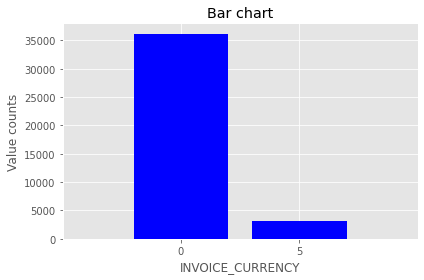

In [2482]:
import matplotlib.pyplot as plt
grp_invoice=train_set.groupby('invoice_currency')['invoice_currency'].agg({'count'}).reset_index()
plt.bar(grp_invoice['invoice_currency'].astype(int).astype(str),grp_invoice['count'],color = 'b')
plt.xlabel('INVOICE_CURRENCY')
plt.xlim((-1,grp_invoice['invoice_currency'].nunique()))
plt.ylabel('Value counts')
# Set a title of the current axes.
plt.title('Bar chart')
# Display a figure.
plt.tight_layout()
######we can infer that invoice_currency has USD as max value_count

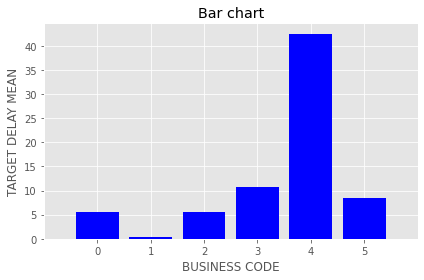

In [2483]:
grp_bc=train_set.groupby('business_code')['target_delay'].agg({'mean'}).reset_index()

plt.bar(grp_bc['business_code'].astype(int).astype(str),grp_bc['mean'],color = 'b')
plt.xlabel('BUSINESS CODE')
plt.xlim((-1,grp_bc['business_code'].nunique()))
plt.ylabel('TARGET DELAY MEAN')
# Set a title of the current axes.
plt.title('Bar chart')
# Display a figure.
plt.tight_layout()
###business code labeled 4 has max target_delay mean

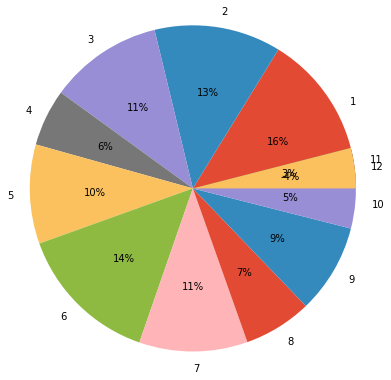

In [2484]:
grp_posting_date_mnth=train_set.groupby('posting_date_month')['target_delay'].agg({'mean'}).reset_index()
plt.figure(figsize=(5,5))
plt.pie(grp_posting_date_mnth['mean'],labels=grp_posting_date_mnth['posting_date_month'],autopct='%1.0f%%',radius = 1.5)
plt.show()
##shows target_delay mean in percentage in every month wrt posting_date

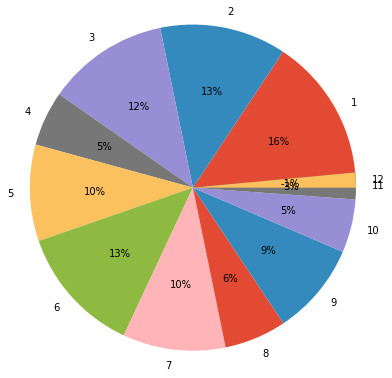

In [2485]:
grp_baseline_cr_date_mnth=train_set.groupby('baseline_create_date_month')['target_delay'].agg({'mean'}).reset_index()
plt.figure(figsize=(5,5))
plt.pie(grp_baseline_cr_date_mnth['mean'],labels=grp_baseline_cr_date_mnth['baseline_create_date_month'],autopct='%1.0f%%',radius = 1.5)
plt.show()
##shows target_delay mean in percentage in every month wrt baseline_create_date
##we notice that above both the date graphs have nearly similar mean monthly

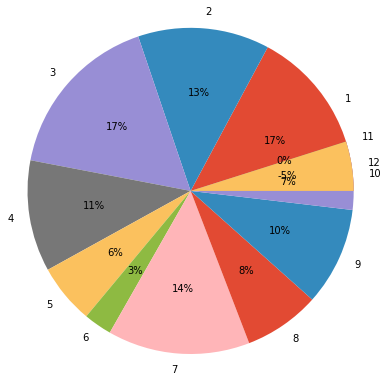

In [2486]:
grp_due_in_date_mnth=train_set.groupby('due_in_date_month')['target_delay'].agg({'mean'}).reset_index()
plt.figure(figsize=(5,5))
plt.pie(grp_due_in_date_mnth['mean'],labels=grp_due_in_date_mnth['due_in_date_month'],autopct='%1.0f%%',radius = 1.5)
plt.show()
##shows target_delay mean in percentage in every month wrt due_in_date


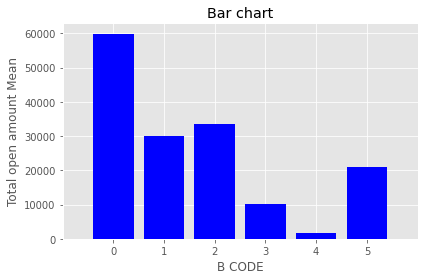

In [2487]:
grp_nc=train_set.groupby('business_code')['total_open_amount'].agg({'mean'}).reset_index()

plt.bar(grp_nc['business_code'].astype(int).astype(str),grp_nc['mean'],color = 'b')
plt.xlabel('B CODE')
plt.xlim((-1,grp_nc['business_code'].nunique()))
plt.ylabel('Total open amount Mean')
# Set a title of the current axes.
plt.title('Bar chart')
# Display a figure.
plt.tight_layout()
###displaying avg total amount for each business code 

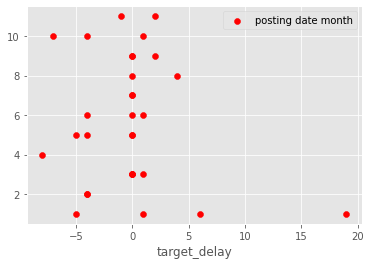

In [2488]:
###Scatter plot of posting date month with target delay
plt.scatter(train_set[:30]['target_delay'], train_set[:30]['posting_date_month'],color='r',label='posting date month')
plt.xlabel("target_delay")
plt.legend()
plt.show()

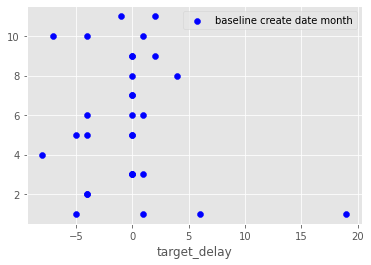

In [2489]:
###Scatter plot of baseline create date month with target delay
plt.scatter(train_set[:30]['target_delay'], train_set[:30]['baseline_create_date_month'],color='b',label='baseline create date month')
plt.xlabel("target_delay")
plt.legend()
plt.show()

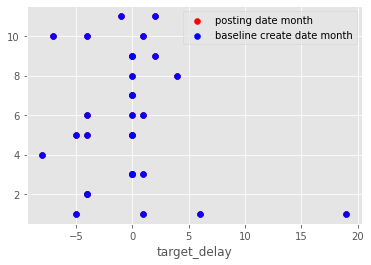

In [2490]:
###Scatter plot of posting date month and basline create date with target delay
plt.scatter(train_set[:30]['target_delay'], train_set[:30]['posting_date_month'],color='r',label='posting date month')
plt.scatter(train_set[:30]['target_delay'], train_set[:30]['baseline_create_date_month'],color='b',label='baseline create date month')

plt.xlabel("target_delay")
plt.legend()
plt.show()

### We see both the points overlap each other

In [2491]:
####Distribution of various columns to check skewness

In [2492]:
##SKEWNESS OF DIFFERENT COLUMNS
from scipy.stats import  skew
print("BUSINESS CODE")
print(skew(train_set['business_code'])) ##highly positive

BUSINESS CODE
4.960971968062309


In [2493]:
from scipy.stats import  skew
print("CUSTOMER NUMBER")
print(skew(train_set['cust_number'])) ##highly positive

CUSTOMER NUMBER
4.985355718762132


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f3447ab38>,
      dtype=object)

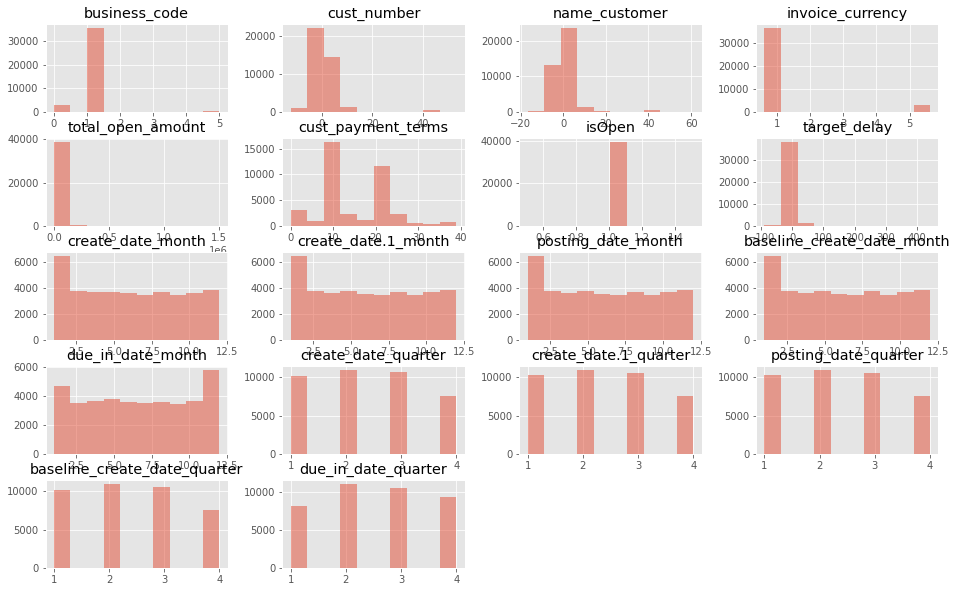

In [2494]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.style.use('ggplot')
train_set.hist(alpha=0.5, figsize=(16, 10))

In [2495]:
from scipy.stats import  skew
print("Customer Name")
print(skew(train_set['name_customer']))   ##highly positive

Customer Name
4.9332065404545515


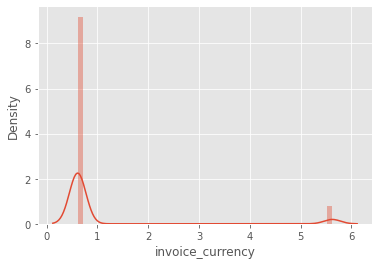

In [2496]:
sns.distplot(train_set['invoice_currency'])

In [2497]:
from scipy.stats import  skew
print("Invoice Currency")
print(skew(train_set['invoice_currency'])) ##highly positive

Invoice Currency
3.1183813996672174


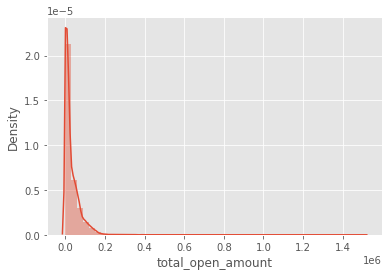

In [2498]:
sns.distplot(train_set['total_open_amount'])

In [2499]:
from scipy.stats import  skew
print("Total Open Amount")
print(skew(train_set['total_open_amount']))  ##highly positive


Total Open Amount
3.8743907399730424


In [2500]:
from scipy.stats import  skew
print("Customer Payment Terms")
print(skew(train_set['cust_payment_terms']))    #less positively skewed

Customer Payment Terms
0.4712970681047752


In [2501]:
from scipy.stats import  skew
print("Is Open")
print(skew(train_set['isOpen']))    

Is Open
0.0


In [2502]:
print("Baseline Create month ")
print(skew(train_set['baseline_create_date_month']))    

Baseline Create month 
0.01449395855472953


In [2503]:
print("Baseline Create Quarter")
print(skew(train_set['baseline_create_date_quarter']))    

Baseline Create Quarter
0.11016424383870904


In [2504]:
print("Create Date Month.1 month ")
print(skew(train_set['create_date.1_month']))    

Create Date Month.1 month 
0.01474858082509874


In [2505]:
print("Create date month.1 quarter ")
print(skew(train_set['create_date.1_quarter']))    

Create date month.1 quarter 
0.1120017141419997


In [2506]:
####Skewness of columns which have high correlation with target label will not be altered

In [2507]:
###invoice currency is highly positively skewed and it is less correlated with target delay so we apply squarert transformation
train_set['invoice_currency']=np.sqrt(train_set['invoice_currency'])

print(skew(train_set['invoice_currency']))  ###no change 

3.118381399667216


In [2508]:
train_set['total_open_amount']=np.sqrt(train_set['total_open_amount'])

print(skew(train_set['total_open_amount']))  ###skewness reduced


0.8349395151764905


In [2509]:
#train_set['cust_payment_terms']=np.sqrt(train_set['cust_payment_terms'])

#print(skew(train_set['cust_payment_terms']))  ###skewness reduced

In [2510]:
train_set.dtypes

business_code                            int64
cust_number                            float64
name_customer                          float64
clear_date                      datetime64[ns]
doc_id                                  object
posting_date                    datetime64[ns]
document_create_date            datetime64[ns]
document_create_date.1          datetime64[ns]
due_in_date                     datetime64[ns]
invoice_currency                       float64
total_open_amount                      float64
baseline_create_date            datetime64[ns]
cust_payment_terms                       int64
isOpen                                 float64
target_delay                             int64
create_date_month                        int64
create_date.1_month                      int64
posting_date_month                       int64
baseline_create_date_month               int64
due_in_date_month                        int64
create_date_quarter                      int64
create_date.1

In [2511]:
train_set['doc_id'].unique

<bound method Series.unique of 0        1.92866e+09
1        1.92921e+09
2        1.92938e+09
3        1.92877e+09
4        1.92941e+09
            ...     
46752    1.92975e+09
46753    1.92953e+09
46754    1.92953e+09
46755    1.92855e+09
46756    1.92892e+09
Name: doc_id, Length: 39318, dtype: object>

In [2512]:
###doc_id is primary key so drop
train_set.drop(['doc_id'],axis=1,inplace=True)

In [2513]:
#remove outliers from target_delay
q1=train_set.target_delay.quantile(0.25)
q3=train_set.target_delay.quantile(0.75)
q1,q3

(-3.0, 2.0)

In [2514]:
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
lower_limit,upper_limit

(-10.5, 9.5)

In [2515]:
train_set[(train_set.target_delay<lower_limit)|(train_set.target_delay>upper_limit)] ##outlier

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,target_delay,create_date_month,create_date.1_month,posting_date_month,baseline_create_date_month,due_in_date_month,create_date_quarter,create_date.1_quarter,posting_date_quarter,baseline_create_date_quarter,due_in_date_quarter
11,1,2.321580,2.171247,2019-03-01,2019-01-25,2019-01-26,2019-01-25,2019-02-10,0.781515,137.766179,2019-01-25,8,1.007299,19,1,1,1,1,2,1,1,1,1,1
37,1,8.884532,18.820000,2019-11-01,2019-09-06,2019-09-04,2019-09-06,2019-10-11,0.781515,145.569228,2019-09-06,20,1.007299,21,9,9,9,9,10,3,3,3,3,4
42,0,53.200000,60.444444,2019-09-18,2019-07-05,2019-07-05,2019-07-05,2019-07-20,2.371141,33.879197,2019-07-10,2,1.007299,60,7,7,7,7,7,3,3,3,3,3
43,1,2.487395,1.400000,2019-03-13,2019-02-13,2019-02-08,2019-02-13,2019-02-28,0.781515,28.339019,2019-02-13,10,1.007299,13,2,2,2,2,2,1,1,1,1,1
44,0,8.516129,11.595238,2019-11-01,2019-09-03,2019-09-03,2019-09-03,2019-10-09,2.371141,168.933123,2019-09-04,20,1.007299,23,9,9,9,9,10,3,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46677,1,3.461538,2.171247,2019-05-10,2019-04-07,2019-04-05,2019-04-07,2019-04-17,0.781515,187.129634,2019-04-07,4,1.007299,23,4,4,4,4,4,2,2,2,2,2
46698,1,2.321580,4.184211,2019-04-23,2019-03-20,2019-03-14,2019-03-20,2019-04-09,0.781515,43.410483,2019-03-20,17,1.007299,14,3,3,3,3,4,1,1,1,1,2
46707,1,43.096601,44.547170,2019-03-01,2019-01-08,2019-01-08,2019-01-08,2019-01-08,0.781515,71.536704,2019-01-08,38,1.007299,52,1,1,1,1,1,1,1,1,1,1
46720,1,43.096601,44.326531,2019-11-27,2019-10-15,2019-10-15,2019-10-15,2019-10-15,0.781515,97.180245,2019-10-15,38,1.007299,43,10,10,10,10,10,4,4,4,4,4


In [2516]:
train_set=train_set[(train_set.target_delay>lower_limit)&(train_set.target_delay<upper_limit)] ##removr outlier
train_set.reset_index(drop=True)

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,target_delay,create_date_month,create_date.1_month,posting_date_month,baseline_create_date_month,due_in_date_month,create_date_quarter,create_date.1_quarter,posting_date_quarter,baseline_create_date_quarter,due_in_date_quarter
0,1,-6.640823,-5.742424,2019-02-06,2019-01-22,2019-01-21,2019-01-22,2019-02-11,0.781515,45.602083,2019-01-22,17,1.007299,-5,1,1,1,1,2,1,1,1,1,1
1,1,-4.493711,-3.893939,2019-05-01,2019-04-26,2019-04-26,2019-04-26,2019-05-09,0.781515,8.277681,2019-04-16,25,1.007299,-8,4,4,4,4,5,2,2,2,2,2
2,1,-3.908537,-4.506667,2019-06-03,2019-05-25,2019-05-25,2019-05-25,2019-06-08,0.781515,40.961201,2019-05-16,25,1.007299,-5,5,5,5,5,6,2,2,2,2,2
3,1,-2.306052,-2.331402,2019-02-20,2019-02-09,2019-02-08,2019-02-09,2019-02-24,0.781515,258.663411,2019-02-09,22,1.007299,-4,2,2,2,2,2,1,1,1,1,1
4,1,-2.165963,-2.507822,2019-06-12,2019-06-01,2019-05-30,2019-06-01,2019-06-16,0.781515,256.113159,2019-06-01,22,1.007299,-4,5,6,6,6,6,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36320,1,0.957746,0.600000,2019-08-30,2019-08-14,2019-08-15,2019-08-14,2019-08-29,0.781515,241.079593,2019-08-14,10,1.007299,1,8,8,8,8,8,3,3,3,3,3
36321,1,-1.636364,4.461538,2019-07-08,2019-06-24,2019-06-23,2019-06-24,2019-07-09,0.781515,108.491705,2019-06-24,15,1.007299,-1,6,6,6,6,7,2,2,2,2,3
36322,1,-2.306052,-1.981413,2019-07-03,2019-06-23,2019-06-21,2019-06-23,2019-07-08,0.781515,265.229146,2019-06-23,22,1.007299,-5,6,6,6,6,7,2,2,2,2,3
36323,1,1.894737,1.666667,2019-01-17,2019-01-02,2019-01-02,2019-01-02,2019-01-17,0.781515,368.345558,2019-01-02,10,1.007299,0,1,1,1,1,1,1,1,1,1,1


In [2517]:
###Graph between create date.1 and posting date whith target variable

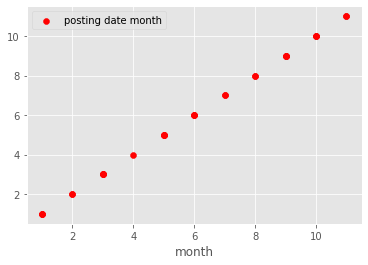

In [2518]:
plt.scatter(train_set[:30]['create_date.1_month'], train_set[:30]['posting_date_month'],color='r',label='posting date month')

plt.xlabel("month")
plt.legend()
plt.show()


In [2519]:
#corr is 1.00 and graph shows their strongly related so dropping posting_date_month
c1=train_set['posting_date_month'].corr(train_set['baseline_create_date_month'])
c2=train_set['posting_date_month'].corr(train_set['target_delay'])
c1,c2

(0.9985934859646209, -0.00036531463662926574)

In [2520]:
train_set.drop(['posting_date_month'],axis=1,inplace=True)
train_set

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,target_delay,create_date_month,create_date.1_month,baseline_create_date_month,due_in_date_month,create_date_quarter,create_date.1_quarter,posting_date_quarter,baseline_create_date_quarter,due_in_date_quarter
0,1,-6.640823,-5.742424,2019-02-06,2019-01-22,2019-01-21,2019-01-22,2019-02-11,0.781515,45.602083,2019-01-22,17,1.007299,-5,1,1,1,2,1,1,1,1,1
1,1,-4.493711,-3.893939,2019-05-01,2019-04-26,2019-04-26,2019-04-26,2019-05-09,0.781515,8.277681,2019-04-16,25,1.007299,-8,4,4,4,5,2,2,2,2,2
2,1,-3.908537,-4.506667,2019-06-03,2019-05-25,2019-05-25,2019-05-25,2019-06-08,0.781515,40.961201,2019-05-16,25,1.007299,-5,5,5,5,6,2,2,2,2,2
3,1,-2.306052,-2.331402,2019-02-20,2019-02-09,2019-02-08,2019-02-09,2019-02-24,0.781515,258.663411,2019-02-09,22,1.007299,-4,2,2,2,2,1,1,1,1,1
4,1,-2.165963,-2.507822,2019-06-12,2019-06-01,2019-05-30,2019-06-01,2019-06-16,0.781515,256.113159,2019-06-01,22,1.007299,-4,5,6,6,6,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46752,1,0.957746,0.600000,2019-08-30,2019-08-14,2019-08-15,2019-08-14,2019-08-29,0.781515,241.079593,2019-08-14,10,1.007299,1,8,8,8,8,3,3,3,3,3
46753,1,-1.636364,4.461538,2019-07-08,2019-06-24,2019-06-23,2019-06-24,2019-07-09,0.781515,108.491705,2019-06-24,15,1.007299,-1,6,6,6,7,2,2,2,2,3
46754,1,-2.306052,-1.981413,2019-07-03,2019-06-23,2019-06-21,2019-06-23,2019-07-08,0.781515,265.229146,2019-06-23,22,1.007299,-5,6,6,6,7,2,2,2,2,3
46755,1,1.894737,1.666667,2019-01-17,2019-01-02,2019-01-02,2019-01-02,2019-01-17,0.781515,368.345558,2019-01-02,10,1.007299,0,1,1,1,1,1,1,1,1,1


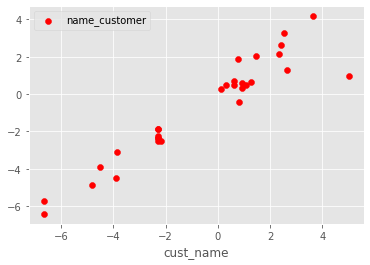

In [2521]:
plt.scatter(train_set[:30]['cust_number'], train_set[:30]['name_customer'],color='r',label='name_customer')
plt.xlabel("cust_name")
plt.legend()
plt.show()


In [2522]:
##invoice currency is correlated to cust_payment_terms and dose not correlate much with target_delay

In [2523]:
c1=train_set['invoice_currency'].corr(train_set['cust_payment_terms'])
c2=train_set['invoice_currency'].corr(train_set['target_delay'])
c3=train_set['cust_payment_terms'].corr(train_set['target_delay'])
c1,c2,c3

(-0.48493884354193545, 0.2600651212461973, -0.4521417193852222)

In [2524]:
train_set.drop(['invoice_currency'],axis=1,inplace=True)

In [2525]:
##baseline_create_date_month is correlated create_date_month.1

In [2526]:
c1=train_set['baseline_create_date_month'].corr(train_set['create_date.1_month'])
c2=train_set['baseline_create_date_month'].corr(train_set['target_delay'])
c1,c2

(0.998593485964621, 0.0009353438680379337)

In [2527]:
train_set.drop(['baseline_create_date_month'],axis=1,inplace=True)

In [2528]:
##baseline_create_date_quarter is correlated create_date_month.1

In [2529]:
c1=train_set['baseline_create_date_quarter'].corr(train_set['create_date.1_month'])
c2=train_set['baseline_create_date_quarter'].corr(train_set['target_delay'])
c1,c2

(0.9675129176105295, 0.0018509417332766194)

In [2530]:
train_set.drop(['baseline_create_date_quarter'],axis=1,inplace=True)

In [2531]:
##due_in_date_month is correlated create_date_month.1

In [2532]:
c1=train_set['due_in_date_quarter'].corr(train_set['create_date.1_month'])
c2=train_set['due_in_date_quarter'].corr(train_set['target_delay'])
c3=train_set['create_date.1_month'].corr(train_set['target_delay'])
c1,c2,c3

(0.9341902711187952, 0.0035049943086771828, -0.00036531463662926574)

In [2533]:
##create_date_month is correlated due_in_date_month

In [2534]:
c1=train_set['create_date_month'].corr(train_set['due_in_date_month'])
c2=train_set['create_date_month'].corr(train_set['target_delay'])
c3=train_set['due_in_date_month'].corr(train_set['target_delay'])
c1,c2,c3

(0.9443645824579473, 0.0008518711448871115, 0.006017240639346102)

In [2535]:
train_set.drop(['create_date_quarter'],axis=1,inplace=True)

In [2536]:
train_set

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,target_delay,create_date_month,create_date.1_month,due_in_date_month,create_date.1_quarter,posting_date_quarter,due_in_date_quarter
0,1,-6.640823,-5.742424,2019-02-06,2019-01-22,2019-01-21,2019-01-22,2019-02-11,45.602083,2019-01-22,17,1.007299,-5,1,1,2,1,1,1
1,1,-4.493711,-3.893939,2019-05-01,2019-04-26,2019-04-26,2019-04-26,2019-05-09,8.277681,2019-04-16,25,1.007299,-8,4,4,5,2,2,2
2,1,-3.908537,-4.506667,2019-06-03,2019-05-25,2019-05-25,2019-05-25,2019-06-08,40.961201,2019-05-16,25,1.007299,-5,5,5,6,2,2,2
3,1,-2.306052,-2.331402,2019-02-20,2019-02-09,2019-02-08,2019-02-09,2019-02-24,258.663411,2019-02-09,22,1.007299,-4,2,2,2,1,1,1
4,1,-2.165963,-2.507822,2019-06-12,2019-06-01,2019-05-30,2019-06-01,2019-06-16,256.113159,2019-06-01,22,1.007299,-4,5,6,6,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46752,1,0.957746,0.600000,2019-08-30,2019-08-14,2019-08-15,2019-08-14,2019-08-29,241.079593,2019-08-14,10,1.007299,1,8,8,8,3,3,3
46753,1,-1.636364,4.461538,2019-07-08,2019-06-24,2019-06-23,2019-06-24,2019-07-09,108.491705,2019-06-24,15,1.007299,-1,6,6,7,2,2,3
46754,1,-2.306052,-1.981413,2019-07-03,2019-06-23,2019-06-21,2019-06-23,2019-07-08,265.229146,2019-06-23,22,1.007299,-5,6,6,7,2,2,3
46755,1,1.894737,1.666667,2019-01-17,2019-01-02,2019-01-02,2019-01-02,2019-01-17,368.345558,2019-01-02,10,1.007299,0,1,1,1,1,1,1


In [2537]:
c1=train_set['posting_date_quarter'].corr(train_set['due_in_date_quarter'])
c2=train_set['posting_date_quarter'].corr(train_set['target_delay'])
c3=train_set['due_in_date_quarter'].corr(train_set['target_delay'])
c1,c2,c3

(0.9244716148406318, 0.0008046388627145212, 0.0035049943086771828)

In [2538]:
##featues of posting date doesnot seem useful
train_set.drop(['posting_date'],axis=1,inplace=True)

In [2539]:
train_set.shape

(36325, 18)

In [2540]:
###########Feature Selection##########

In [2541]:
x_train=train_set.copy()
x_train=x_train.drop(['target_delay'],axis=1)

In [2542]:
def handling_correlation(df,threshold=0.8):   #correlation less than threshold
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = df.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [2543]:
handling_correlation(train_set.copy(),0.80)

['name_customer',
 'create_date.1_month',
 'due_in_date_quarter',
 'due_in_date_month',
 'create_date.1_quarter',
 'posting_date_quarter']

In [2544]:
x_train_new=x_train.drop(['due_in_date_quarter','create_date.1_quarter'],axis=1)
train_set=train_set.drop(['due_in_date_quarter','create_date.1_quarter'],axis=1)

In [2545]:
handling_correlation(x_train_new.copy(),0.80)

['due_in_date_month',
 'posting_date_quarter',
 'name_customer',
 'create_date.1_month']

In [2546]:
x_train_new=x_train_new.drop(['posting_date_quarter'],axis=1)
train_set=train_set.drop(['posting_date_quarter'],axis=1)

In [2547]:
y=train_set['target_delay']
y

0       -5
1       -8
2       -5
3       -4
4       -4
        ..
46752    1
46753   -1
46754   -5
46755    0
46756    0
Name: target_delay, Length: 36325, dtype: int64

In [2548]:
x_train_new=x_train_new.drop(['clear_date','due_in_date','document_create_date.1','document_create_date','baseline_create_date'],axis=1)
x_train_new

,business_code,cust_number,name_customer,total_open_amount,cust_payment_terms,isOpen,create_date_month,create_date.1_month,due_in_date_month
0,1,-6.640823,-5.742424,45.602083,17,1.007299,1,1,2
1,1,-4.493711,-3.893939,8.277681,25,1.007299,4,4,5
2,1,-3.908537,-4.506667,40.961201,25,1.007299,5,5,6
3,1,-2.306052,-2.331402,258.663411,22,1.007299,2,2,2
4,1,-2.165963,-2.507822,256.113159,22,1.007299,5,6,6
...,...,...,...,...,...,...,...,...,...
46752,1,0.957746,0.600000,241.079593,10,1.007299,8,8,8
46753,1,-1.636364,4.461538,108.491705,15,1.007299,6,6,7
46754,1,-2.306052,-1.981413,265.229146,22,1.007299,6,6,7
46755,1,1.894737,1.666667,368.345558,10,1.007299,1,1,1


In [2549]:
x_train_new

,business_code,cust_number,name_customer,total_open_amount,cust_payment_terms,isOpen,create_date_month,create_date.1_month,due_in_date_month
0,1,-6.640823,-5.742424,45.602083,17,1.007299,1,1,2
1,1,-4.493711,-3.893939,8.277681,25,1.007299,4,4,5
2,1,-3.908537,-4.506667,40.961201,25,1.007299,5,5,6
3,1,-2.306052,-2.331402,258.663411,22,1.007299,2,2,2
4,1,-2.165963,-2.507822,256.113159,22,1.007299,5,6,6
...,...,...,...,...,...,...,...,...,...
46752,1,0.957746,0.600000,241.079593,10,1.007299,8,8,8
46753,1,-1.636364,4.461538,108.491705,15,1.007299,6,6,7
46754,1,-2.306052,-1.981413,265.229146,22,1.007299,6,6,7
46755,1,1.894737,1.666667,368.345558,10,1.007299,1,1,1


In [2550]:
###############checking feature importance
def tree_based_feature_importance(x_train,y):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

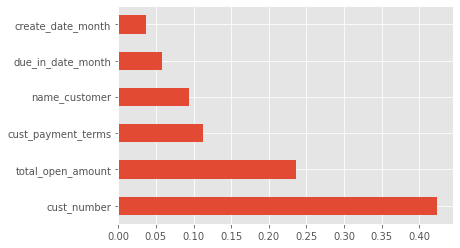

In [2551]:
feature_importance=tree_based_feature_importance(x_train_new,y)#features importance data frame

In [2552]:
display(feature_importance)

,Features,Importances
1,cust_number,0.424039
3,total_open_amount,0.235885
4,cust_payment_terms,0.112118
2,name_customer,0.093864
8,due_in_date_month,0.057911
6,create_date_month,0.036412
7,create_date.1_month,0.034550
0,business_code,0.005222
5,isOpen,0.000000


In [2553]:
x_train_new=x_train_new.drop(['isOpen','business_code','create_date_month','create_date.1_month'],axis=1)
train_set=train_set.drop(['isOpen','business_code','create_date_month','create_date.1_month'],axis=1)


In [2554]:
train_set

,cust_number,name_customer,clear_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,target_delay,due_in_date_month
0,-6.640823,-5.742424,2019-02-06,2019-01-21,2019-01-22,2019-02-11,45.602083,2019-01-22,17,-5,2
1,-4.493711,-3.893939,2019-05-01,2019-04-26,2019-04-26,2019-05-09,8.277681,2019-04-16,25,-8,5
2,-3.908537,-4.506667,2019-06-03,2019-05-25,2019-05-25,2019-06-08,40.961201,2019-05-16,25,-5,6
3,-2.306052,-2.331402,2019-02-20,2019-02-08,2019-02-09,2019-02-24,258.663411,2019-02-09,22,-4,2
4,-2.165963,-2.507822,2019-06-12,2019-05-30,2019-06-01,2019-06-16,256.113159,2019-06-01,22,-4,6
...,...,...,...,...,...,...,...,...,...,...,...
46752,0.957746,0.600000,2019-08-30,2019-08-15,2019-08-14,2019-08-29,241.079593,2019-08-14,10,1,8
46753,-1.636364,4.461538,2019-07-08,2019-06-23,2019-06-24,2019-07-09,108.491705,2019-06-24,15,-1,7
46754,-2.306052,-1.981413,2019-07-03,2019-06-21,2019-06-23,2019-07-08,265.229146,2019-06-23,22,-5,7
46755,1.894737,1.666667,2019-01-17,2019-01-02,2019-01-02,2019-01-17,368.345558,2019-01-02,10,0,1


In [2555]:
x_train_new

,cust_number,name_customer,total_open_amount,cust_payment_terms,due_in_date_month
0,-6.640823,-5.742424,45.602083,17,2
1,-4.493711,-3.893939,8.277681,25,5
2,-3.908537,-4.506667,40.961201,25,6
3,-2.306052,-2.331402,258.663411,22,2
4,-2.165963,-2.507822,256.113159,22,6
...,...,...,...,...,...
46752,0.957746,0.600000,241.079593,10,8
46753,-1.636364,4.461538,108.491705,15,7
46754,-2.306052,-1.981413,265.229146,22,7
46755,1.894737,1.666667,368.345558,10,1


In [2556]:
x_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36325 entries, 0 to 46756
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cust_number         36325 non-null  float64
 1   name_customer       36325 non-null  float64
 2   total_open_amount   36325 non-null  float64
 3   cust_payment_terms  36325 non-null  int64  
 4   due_in_date_month   36325 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 1.7 MB


In [2557]:
x_train_new['cust_number'].isnull().sum() 

0

In [2558]:
test_data['due_in_date_month']=test_data['due_in_date'].dt.month
val1['due_in_date_month']=val1['due_in_date'].dt.month
val2['due_in_date_month']=val2['due_in_date'].dt.month


#test_data['create_date.1_month']=test_data['document_create_date.1'].dt.month
#val1['create_date.1_month']=val1['document_create_date.1'].dt.month
#val2['create_date.1_month']=val2['document_create_date.1'].dt.month


In [2559]:
####Model

In [2560]:
import warnings
warnings.filterwarnings('ignore')
# Modeling & Accuracy Metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2562]:
# Fitting Simple Linear Regression to the Training Set
#Algorithm.append('Linear Regression')
#clf = LinearRegression()
#clf.fit(x_train_new, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2563]:
#predicted = clf.predict(x_train_new)

In [2565]:
x_val1=val1.copy()
x_val1=x_val1.drop(['target_delay'],axis=1)


In [2566]:
x_val1_new=x_val1.drop(['clear_date','due_in_date','document_create_date','document_create_date.1','posting_date','baseline_create_date','isOpen','business_code','buisness_year','doc_id','invoice_currency'],axis=1)

In [2567]:
y_val1=val1['target_delay']

In [2569]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # create an instance
x_train_new_scaled = scaler.fit_transform(x_train_new) #  fit  the scaler to the train set and then transform it
x_val1_new_scaled = scaler.transform(x_val1_new) 

In [2574]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_new_scaled = scaler.fit_transform(x_train_new_scaled) #  fit  the scaler to the train set and then transform it
x_val1_new_scaled = scaler.transform(x_val1_new_scaled) 

In [2575]:
#Algorithm.append('Linear Regression')
#clf = LinearRegression()
#clf.fit(x_train_new_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2576]:
#predicted = clf.predict(x_train_new_scaled)

In [2577]:
#t1=mean_squared_error(y, predicted)
#t2=r2_score(y, predicted)
#t1,t2

(7.210396820144025, 0.3299068701172091)

In [2578]:
#predicte = clf.predict(x_val1_new_scaled)
#t1=mean_squared_error(y_val1, predicte)
#t2=r2_score(y_val1, predicte)
#t1,t2

(270.85432211579456, -3.205109790164566)

In [2579]:
x_val2=val2.copy()
x_val2=x_val2.drop(['target_delay'],axis=1)


In [2580]:
x_val2_new=x_val2.drop(['clear_date','due_in_date','document_create_date','document_create_date.1','posting_date','baseline_create_date','isOpen','business_code','buisness_year','doc_id','invoice_currency'],axis=1)

In [2581]:
y_val2=val2['target_delay']

In [2582]:
x_val2_new_scaled = scaler.transform(x_val2_new)

In [2583]:
scaler = StandardScaler()
x_train_new_scaled = scaler.fit_transform(x_train_new_scaled) #  fit  the scaler to the train set and then transform it

x_val2_new_scaled = scaler.transform(x_val2_new_scaled) 

In [2584]:
#Algorithm.append('Linear Regression')
#clf = LinearRegression()
#clf.fit(x_train_new_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2585]:
#predicted = clf.predict(x_train_new_scaled)

In [2586]:
#t1=mean_squared_error(y, predicted)
#t2=r2_score(y, predicted)
#t1,t2

(7.210396820144025, 0.3299068701172091)

In [2587]:
#predicte = clf.predict(x_val2_new_scaled)
#t1=mean_squared_error(y_val2, predicte)
#t2=r2_score(y_val2, predicte)
#t1,t2

(124919352.83633804, -1170378.6851002972)

In [2588]:
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(x_train_new_scaled, y)

# Predicting the Test Set Results
predicted = clf.predict(x_train_new_scaled)

In [2589]:
t1=mean_squared_error(y, predicted)
t2=r2_score(y, predicted)
t1,t2

(0.031986694195916494, 0.9970273391932516)

In [2590]:
predicted = clf.predict(x_val1_new_scaled)
t2=r2_score(y_val1, predicted)
t1,t2

(0.031986694195916494, -0.10929760525170718)

In [2591]:
predicted = clf.predict(x_val2_new_scaled)
t2=r2_score(y_val2, predicted)
t1,t2

(0.031986694195916494, -0.0018646645659179395)

In [2592]:
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(x_train_new_scaled, y)

# Predicting the Test Set Results
predicted = clf.predict(x_train_new_scaled)

In [2593]:
t1=mean_squared_error(y, predicted)
t2=r2_score(y, predicted)
t1,t2

(0.8103796746177993, 0.9246879379729905)

In [2594]:
predicted = clf.predict(x_val1_new_scaled)
t2=r2_score(y_val1, predicted)
t1,t2

(0.8103796746177993, 0.08541669719092415)

In [2595]:
predicted = clf.predict(x_val2_new_scaled)
t2=r2_score(y_val2, predicted)
t1,t2

(0.8103796746177993, 0.055938347893070395)